# Online Retail

Features - 
1. InvoiceNo	
2. StockCode	
3. Description	
4. Quantity	
5. Invoice Date	
6. UnitPrice	
7. CustomerID	
8. Country

Questions on the basis of business problems-

#### 1. what kind of business is this company in?
#### 2. Analyze the sales performance of this company, and provide your insights regarding the same
#### 3. Based on your analysis of the data, what are potential areas of improvement for the business?
#### 4. What are additional business problems that can be analyzed using this data. Support with explanation.

#### The Answers are provided below with proper analysis. Could have further more analyzed the data. But felt this was good enough for the test. Can do better analysis if needed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df = df[['CustomerID','InvoiceNo','StockCode','Description','Quantity','UnitPrice','InvoiceDate','Country']]

In [5]:
df['CustomerID'] = df.CustomerID.astype('str')

ref = df.copy()
ref.drop(ref[ref['Quantity'] < 0].index, inplace = True)

In [6]:
print(ref.shape)
# ref.isnull().sum()
ref['InvoiceDate'] = pd.to_datetime(ref['InvoiceDate'])

(531285, 8)


In [7]:
ref.InvoiceDate.describe()

count                  531285
unique                  19052
top       2011-10-31 14:41:00
freq                     1114
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

In [8]:
ref.Country.nunique()

38

In [9]:
ref= ref[(ref.Quantity>0) & (ref.UnitPrice>0)]

In [10]:
ref.dropna(subset=['CustomerID','Description'],inplace=True)

In [11]:
ref.InvoiceDate.isna().sum()


# datalist = pd.date_range(start="2010-12-01",end="2011-12-09")

# zz = 0
# for i in ref['InvoiceDate']:
#     if zz<=10:
#         i = datetime.date(i)
#         if i not in datalist:
#             print(i)


0

### 1. Based on your understanding of the data, what kind of business is this company in?

#### Answer - this company is more into ```online retail``` across 38 countries.

-----------------------------------------------------------------------------------------------------------------

### 2. Analyze the sales performance of this company, and provide your insights regarding the same like

In [12]:
ref['totalprice'] = ref['Quantity']*ref['UnitPrice']
ref['Year'] =  pd.DatetimeIndex(ref['InvoiceDate']).year
ref['month'] = pd.DatetimeIndex(ref['InvoiceDate']).month



### 1.total monthly invoice

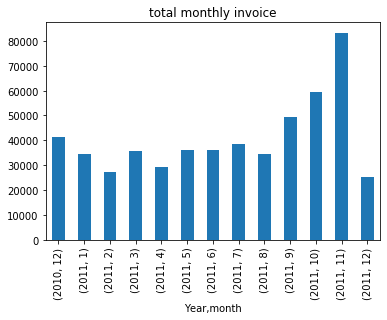

In [13]:
ref.groupby(['Year','month']).InvoiceNo.count().plot(kind='bar',title='total monthly invoice')
plt.show()

#### 2.total number of CustomerID

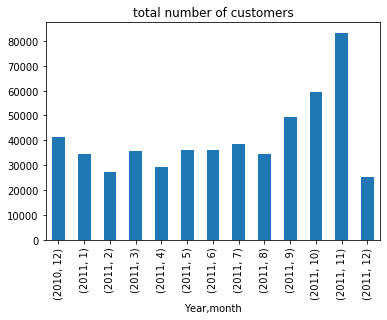

In [16]:
ref.groupby(['Year','month']).CustomerID.count().plot(kind='bar',title='total number of customers')
plt.show()

### 3. total number of Quantity

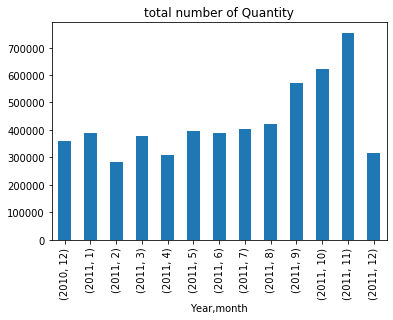

In [15]:
ref.groupby(['Year','month']).Quantity.sum().plot(kind='bar',title='total number of Quantity')
plt.show()

### 4. why sales dropped in ```december``` compare to ```november```

In [92]:
# x = pd.DatetimeIndex(ref.InvoiceDate).unique().date
x_2011 = ref[ref.Year==2011]
x_2011 = x_2011[ref.month==12]
x_2011.InvoiceDate.dt.date.unique()

e:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


array([datetime.date(2011, 12, 1), datetime.date(2011, 12, 2),
       datetime.date(2011, 12, 4), datetime.date(2011, 12, 5),
       datetime.date(2011, 12, 6), datetime.date(2011, 12, 7),
       datetime.date(2011, 12, 8), datetime.date(2011, 12, 9)],
      dtype=object)

In [20]:
ls=[]
ls.append(ref.Country.unique())
print(ls,"=>",ref.Country.nunique(),"countries")

[array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)] => 38 countries



### 6.  total amount of sales (top 10 Country)

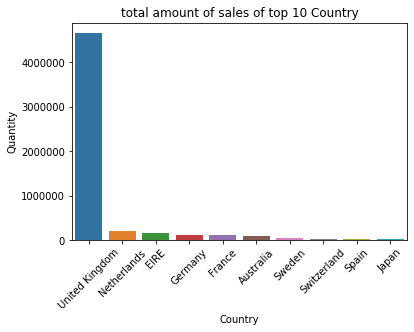

In [19]:
country_sales  = pd.DataFrame(ref.groupby(['Country'])['Quantity'].sum().sort_values(ascending=False).reset_index()[:10])
sns.barplot(x = country_sales['Country'],y = country_sales['Quantity'])
plt.xticks(rotation=45)
plt.title("total amount of sales of top 10 Country")
plt.show()

### 7. total amount of sales (lowest 5 Country)

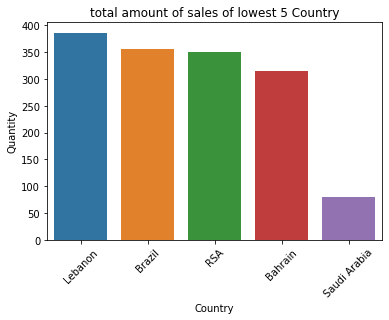

In [20]:
lastcountry_sales  = pd.DataFrame(ref.groupby(['Country'])['Quantity'].sum().sort_values(ascending=False).reset_index()[33:])
sns.barplot(x = lastcountry_sales['Country'],y = lastcountry_sales['Quantity'])
plt.xticks(rotation=45)
plt.title("total amount of sales of lowest 5 Country")
plt.show()

### 8. ```Revenue``` per year

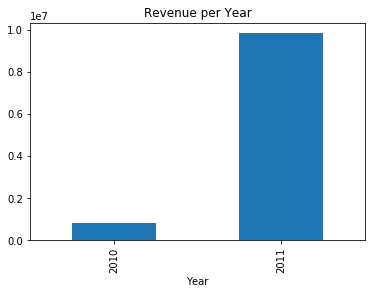

In [22]:
ref.groupby(['Year']).totalprice.sum().plot(kind='bar')
plt.title("Revenue per Year")
plt.show()

### 9. total sales per month

Year  month
2010  12        823746.140
2011  1         691364.560
      2         523631.890
      3         717639.360
      4         537808.621
      5         770536.020
      6         761739.900
      7         719221.191
      8         759138.380
      9        1058590.172
      10       1154979.300
      11       1509496.330
      12        638792.680
Name: totalprice, dtype: float64


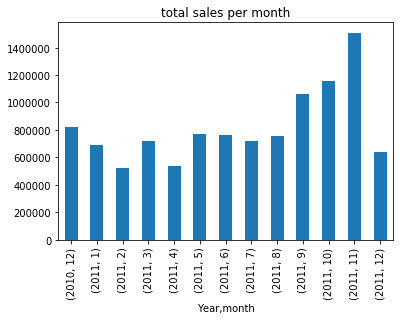

In [23]:
totalsales = ref.groupby(['Year','month']).totalprice.sum()
print(totalsales)
totalsales.plot(kind='bar')
plt.title("total sales per month")
plt.show()

## 10. <b><u>```Sales Performance``` can be seen with</u></b>

##### 1. sales per every month and every year
##### 2. if we compare 2010 sales data we have sales only for dec and in 2011 we have sales for all months

##### 3. <b>UPTREND -</b> ```September``` to ```Novembor``` we have very good sales ie we have uptrend in these month (according to total price data)
##### 4. <b>DOWNTREND -</b> In DEC 2010 we have sales of ```823746.140``` and in DEC 2011 we have  ```638792.680``` a downtrend in our sales but after seeing and analyzed,i further found out that We have sales data upto 9th on dec 2011, so we found a sales drop in the month of dec 2011

--------------------------------------------------------------------------------------------------------------------------------------------
### 11. Based on analysis of the data, what are potential areas of improvement for the business?

In [24]:
ref.isnull().sum()

CustomerID     0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
InvoiceDate    0
Country        0
totalprice     0
Year           0
month          0
dtype: int64

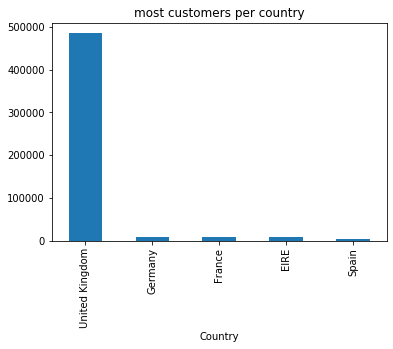

In [25]:
ref.groupby(['Country']).CustomerID.count().sort_values(ascending=False)[:5].plot(kind='bar',title='most customers per country')
plt.show()

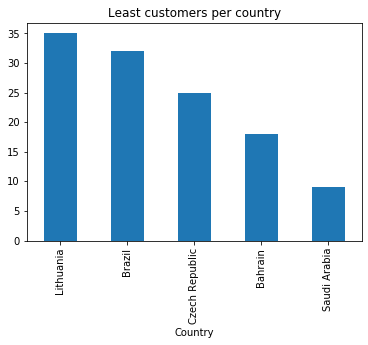

In [26]:
ref.groupby(['Country']).CustomerID.count().sort_values(ascending=False)[-5:].plot(kind='bar',title='Least customers per country')
plt.show()

## <b>analysis</b>


##### => We see that september to december we have very high sales
##### => We can concentrate on improving the sales for the other 8 months
##### => We find very less number of customers in Lithuania, Brazil, Czech Republic, Bahrain, Saudi Arabia so We can concentrate on improving on the basis of ```customers``` and ```sales``` in these downtrend country.



### 12. What are additional business problems that can be analyzed using this data. Support with explanation.

In [27]:
ref.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice,InvoiceDate,Country,totalprice,Year,month
0,17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,2010-12-01 08:26:00,United Kingdom,15.30,2010,12
1,17850.0,536365,71053,WHITE METAL LANTERN,6,3.39,2010-12-01 08:26:00,United Kingdom,20.34,2010,12
2,17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,2010-12-01 08:26:00,United Kingdom,22.00,2010,12
3,17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,2010-12-01 08:26:00,United Kingdom,20.34,2010,12
4,17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,2010-12-01 08:26:00,United Kingdom,20.34,2010,12


In [31]:
avg_sales = ref.groupby(['Description','Country'])['Quantity','totalprice'].mean().reset_index().sort_values(by='Quantity',ascending=False)
avg_sales

e:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Description,Country,Quantity,totalprice
11405,"PAPER CRAFT , LITTLE BIRDIE",United Kingdom,80995.0,168469.60
1208,ASSORTED INCENSE PACK,EIRE,1440.0,230.40
17804,TEA TIME TEA TOWELS,United Kingdom,1300.0,3022.50
1202,"ASSORTED FLOWER COLOUR ""LEIS""",EIRE,960.0,403.20
6756,GINGHAM HEART DECORATION,Netherlands,936.0,673.92
...,...,...,...,...
14643,RUSTIC SEVENTEEN DRAWER SIDEBOARD,EIRE,1.0,165.00
17780,TEA TIME OVEN GLOVE,Unspecified,1.0,1.25
17757,TEA TIME DES TEA COSY,Spain,1.0,2.55
8810,LADIES & GENTLEMEN METAL SIGN,Switzerland,1.0,2.55


In [68]:
conditions = (ref['Country'] == 'Saudi Arabia') | (ref['Country'] == 'Bahrain') | (ref['Country'] == 'Czech Republic') | (ref['Country'] == 'Brazil')| (ref['Country'] == 'Lithuania')

In [69]:
low_trend = ref[conditions]
low_trend.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice,InvoiceDate,Country,totalprice,Year,month
7986,15332.0,537081,22409,MONEY BOX BISCUITS DESIGN,12,1.25,2010-12-05 12:00:00,Lithuania,15.0,2010,12
7987,15332.0,537081,21915,RED HARMONICA IN BOX,36,1.25,2010-12-05 12:00:00,Lithuania,45.0,2010,12
7988,15332.0,537081,15056BL,EDWARDIAN PARASOL BLACK,12,5.95,2010-12-05 12:00:00,Lithuania,71.4,2010,12
7989,15332.0,537081,15056N,EDWARDIAN PARASOL NATURAL,12,5.95,2010-12-05 12:00:00,Lithuania,71.4,2010,12
7990,15332.0,537081,20679,EDWARDIAN PARASOL RED,12,5.95,2010-12-05 12:00:00,Lithuania,71.4,2010,12


In [71]:
low_trend_pivot = low_trend.pivot_table(columns='Year',index='Country',values='Quantity',margins=True)
low_trend_pivot.fillna(0)

Year,2010,2011,All
Country,,,
Bahrain,54.000000,15.294118,17.444444
Brazil,0.000000,11.125000,11.125000
Czech Republic,0.000000,26.840000,26.840000
Lithuania,18.628571,0.000000,18.628571
Saudi Arabia,0.000000,8.888889,8.888889
All,19.611111,16.469880,17.420168
